# 9과 [예제] 범주 vs 범주

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 보스톤 시, 타운별 집값  
③ 아이리스 꽃 분류
④ 뉴욕 공기 오염도


In [119]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


In [3]:
# 아이리스 꽃 분류
iris = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston2_NA.csv')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.0


In [5]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
4,19,NaN,14.3,56,1973-05-05,5,5


## 2.교차표(pd.crosstab) 
## = 분할표(Contingency Table)
## =  Confusion Matrix

Pandas의 교차표 함수 : pd.crosstab( 행(index), 열, normalize = )
* Normalize 옵션을 사용해 봅시다.
    * columns : 열 기준 100%
    * index : 행 기준 100%
    * all : 전체 기준 100%

### 1) 그냥 집계하기 :  pd.crosstab(행 , 열)

In [68]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.

# 행 : Survived, 열 : Sex
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [69]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.

# 행 : Sex, 열 : Survived
pd.crosstab(titanic['Sex'], titanic['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


- pd.crosstab(index = 행 , columns = 열)

In [47]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(index=titanic['Survived'], columns =titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


- pd.crosstab(columns = 열, index = 행)

In [49]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(columns =titanic['Sex'], index=titanic['Survived'])

Sex,female,male
Survived,,
0,81,468
1,233,109


### 2) pd.crosstab(행, 열,  normalize = 'columns')  
- normalize = 'columns' : 열 기준 100%

In [50]:
# 성별에 따라서 생존율을 보겠다 ★
pd.crosstab(titanic['Survived'], titanic['Sex'], 
            normalize = 'columns')

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


## 3) pd.crosstab(행, 열,  normalize = 'index')   
- normalize = 'index' : 행 기준

In [51]:
pd.crosstab(titanic['Survived'], titanic['Sex']
            , normalize = 'index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


## 4) pd.crosstab(행, 열,  normalize = 'all')   
- normalize = 'all' : 전체 기준 100%

In [52]:
pd.crosstab(titanic['Survived'], titanic['Sex'], 
            normalize = 'all')

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


In [53]:
# Pclass별 생존여부 교차표를 칼럼기준 비율로 만들어 봅시다.
pd.crosstab(titanic['Survived'], titanic['Pclass'], 
            normalize = 'columns')

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


In [54]:
# Pclass별 생존여부 교차표 : 행기준 비율
pd.crosstab(titanic['Survived'], titanic['Pclass'], 
            normalize = 'index')

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


In [55]:
# Pclass별 생존여부 교차표 : 전체 기준 비율
pd.crosstab(titanic['Survived'], titanic['Pclass'], 
            normalize = 'all')

Pclass,1,2,3
Survived,,,
0,0.089787,0.108866,0.417508
1,0.152637,0.097643,0.133558


## 3.시각화 : bar chart, mosaic

### - crosstab을 이용하여, normalize = ‘index’로 집계

* 100% Stacked bar chart (= 비율을 비교하는 bar chart)

* Pclass --> Survived 

In [70]:
# 1) 집계 - 교차표(pd.crosstab)

temp = pd.crosstab(titanic['Pclass'], titanic['Survived'],
                   normalize = 'index')
print(temp)

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


In [73]:
# 범주형 변수의 평균을 구하면 율이 된다

print('사망률: {}'.format(titanic['Survived'].mean()))

사망률: 0.3838383838383838


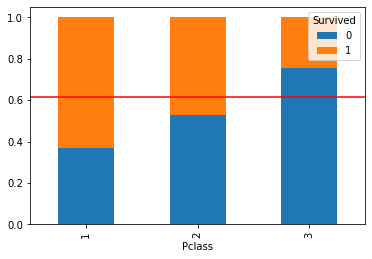

In [74]:
# 2) stacked bar

temp.plot.bar(stacked=True)

# 평균선 추가
plt.axhline(1-titanic['Survived'].mean(), color = 'r') # 생존률 : 1- titanic['Survived'].mean()
plt.show()

→ titanic['Survived'].mean() 값이 사망률이라  
1-mean이 생존률

### - mosaic plot : mosaic( dataframe, [ x, y ])  
→ 별도 집계단계가 필요하지 않습니다.

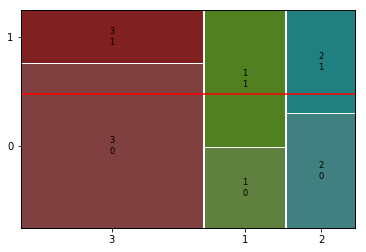

In [75]:
# Pclass별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(titanic, ['Pclass','Survived'])

# 평균선 추가
plt.axhline(1-titanic['Survived'].mean(), color = 'r') # 생존률 : 1- titanic['Survived'].mean()
plt.show()

→ X축 길이 : 각 객실등급별 승객비율  
→ y축의 길이 : 각 객실등급별 사망, 생존 비율

→ mosaic plot은 **율**과 **양**을 알 수 있다.

### 실습 : 시각화

* Embarked --> Survived  

    * 교차표(pd.crosstab)  
    * 100% stacked bar  
    * mosaic plot

In [77]:
# 교차표1 - pd.crosstab()
pd.crosstab(titanic['Survived'], titanic['Embarked'], 
            normalize = 'columns')

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.663043
1,0.553571,0.38961,0.336957


In [78]:
# 교차표2 - pd.crosstab()
pd.crosstab(titanic['Embarked'], titanic['Survived'], 
            normalize = 'index')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


100% stacked bar chart 그릴때는  
pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize = 'index')  
normalize = 'index'로 꼭 그려야지 안그러면 에러 난다!!

In [80]:
# 평균 생존율
tot_mean = titanic['Survived'].mean() # y의 전체 생존율 평균 38.4%
print(tot_mean)

0.3838383838383838


Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957


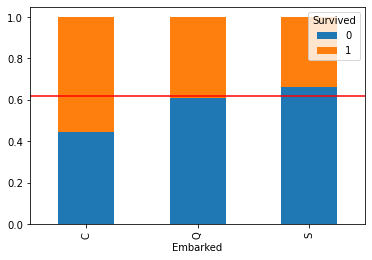

In [81]:
# 100% stacked bar chart
temp = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize = 'index')
print(temp)

temp.plot.bar(stacked=True)
plt.axhline(1-tot_mean, color = 'r') # 전체평균
plt.show()

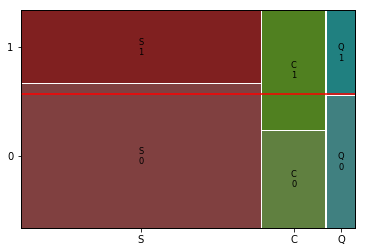

In [83]:
# mosaic plot - mosaic(데이터프레임, ['x축', 'y축'])

mosaic(titanic, ['Embarked', 'Survived'])

# 평균선 추가
plt.axhline(1-tot_mean, color = 'r')
plt.show()

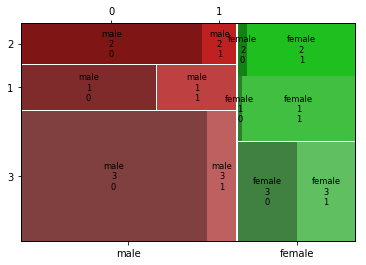

In [84]:
# 세 범주로 그리려면...
mosaic(titanic, ['Sex','Pclass','Survived'])
plt.show()

## 4.수치화 : 카이제곱검정

* 카이제곱검정

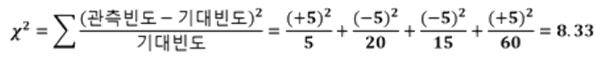

* 타이타닉 데이터에서 객실등급과 생존여부 간의 카이제곱 검정을 수행해 봅시다.

In [88]:
pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [90]:
# 먼저 집계(normalize 옵션 사용 안함 !!!!)
table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
print('교차표\n', table)
print('-' * 50)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
--------------------------------------------------
카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23
기대빈도
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


→ **기대빈도** 계산  
-  **교차표**를 이용  

In [ ]:
Pclass       1                              2                          3  

Survived                                                                                                               백분율(%)
0(사망)     80                              97                        372                     549(Survived=0 행의 합)  549 / 891 * 100 (62%)   
1(생존)    136                              87                        119                     342(Survived=1 행의 합)  342 / 891 * 100 (38%)

           216(Pclass=1 열의 합)           184(Pclass=2 열의 합)     491(Pclass=2 열의 합)   891(총합 = 전체 표본 수)
           
           216 / 891 * 100 (24%)           184 / 891 * 100 (21%)     491 / 891 * 100 (55%)
백분율(%)→(열의 합/전체 표본 수*100)  

- **기대빈도**

In [ ]:
Pclass          1                                                 2                                                  3  

Survived                                                                                                                 
0(사망)        216               * (549 / 891 * 100 (=62%))      184               * (549 / 891 * 100 (=62%))      491               * (549 / 891 * 100 (=62%))    549(Survived=0 행의 합)  549 / 891 * 100 (62%)   
              (Pclass=1 열의 합) * 행 백분율(%)                 (Pclass=2 열의 합) * 행 백분율(%)                  (Pclass=3 열의 합) * 행 백분율(%)

    
1(생존)        216               * (342 / 891 * 100 (38%))       184               * (342 / 891 * 100 (38%))       491               * (342 / 891 * 100 (38%))     342(Survived=1 행의 합)  342 / 891 * 100 (38%)
              (Pclass=1 열의 합) * 행 백분율(%)                 (Pclass=2 열의 합) * 행 백분율(%)                  (Pclass=3 열의 합) * 행 백분율(%)
              

               216(Pclass=1 열의 합)           184(Pclass=2 열의 합)     491(Pclass=2 열의 합)   891(총합 = 전체 표본 수)
           
               216 / 891 * 100 (24%)           184 / 891 * 100 (21%)     491 / 891 * 100 (55%)
열 백분율(%)→(열의 합/전체 표본 수*100)  

### 실습
다음의 범주형 변수들에 대해서 관계를 살펴봅시다.

* Sex --> Survived

In [113]:
# 집계
table = pd.crosstab(titanic['Survived'], titanic['Sex'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n', result[3])

교차표
 Sex       female  male
Survived              
0             81   468
1            233   109
----------------------------------------------------------------------------------------------------
카이제곱통계량 260.71702016732104
p-value 1.1973570627755645e-58
자유도 1
기대빈도
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


* Embarked --> Survived

In [114]:
# 집계
table = pd.crosstab(titanic['Survived'], titanic['Embarked'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n', result[3])

교차표
 Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
----------------------------------------------------------------------------------------------------
카이제곱통계량 26.48914983923762
p-value 1.769922284120912e-06
자유도 2
기대빈도
 [[103.7480315  47.5511811 397.7007874]
 [ 64.2519685  29.4488189 246.2992126]]


* (참조) 여러 변수들에 대해서 한꺼번에 검정 수행

이럴때 for loop!

In [120]:
vars = ['Pclass','Sex','Embarked','Title']

for v in vars :
    table = pd.crosstab(titanic['Survived'], titanic[v])
    result = spst.chi2_contingency(table, correction=False)
    print(v)
    print("카이제곱통계량 : {:.4f}".format(result[0]))
    print("p-value : {:.20f}".format(result[1]))
    print('--------------------------------------')


Pclass
카이제곱통계량 : 102.8890
p-value : 0.00000000000000000000
--------------------------------------
Sex
카이제곱통계량 : 263.0506
p-value : 0.00000000000000000000
--------------------------------------
Embarked
카이제곱통계량 : 25.9645
p-value : 0.00000230086264814496
--------------------------------------
Title
카이제곱통계량 : 289.1953
p-value : 0.00000000000000000000
--------------------------------------


기대빈도: 귀무가설이 참일 때 나올 수 있는 빈도수  
카이제곱 검정 : 기대빈도로 부터의 차이를 보는 것